# Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Accessing dataset

In [75]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [76]:
df = df.drop(columns=['User ID', 'Gender']) #keeping it simple with only two features

In [77]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Generate plot to visualize

In [78]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [79]:
X0s = X.loc[df['Purchased'] == 0]
X1s = X.loc[df['Purchased'] == 1]

/tmp/ipykernel_799/3320142847.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


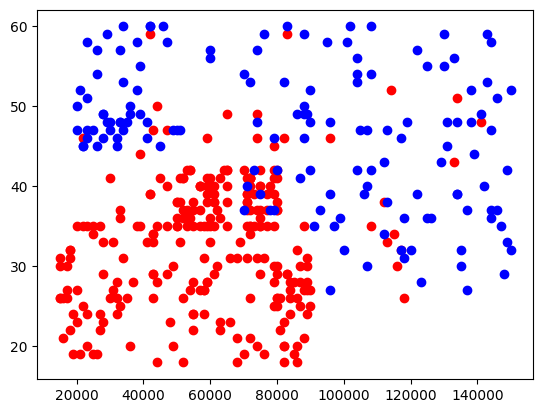

In [80]:
fig, ax = plt.subplots(1,1)
ax.scatter(X0s['EstimatedSalary'], X0s['Age'], color='red')
ax.scatter(X1s['EstimatedSalary'], X1s['Age'], color='blue')
fig.show()

# Building Algorithm

In [81]:
class MultivariateLogisticRegression:
    def __init__(self, learning_rate:float, epochs:int):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta_vector = np.array([])
    
    def fit(self, features:pd.DataFrame, labels:pd.DataFrame):
        X = features
        Y = labels
        X['x0'] = np.ones((Y.size))

        col = list(range(len(list(X.columns))))
        col.insert(0, col[-1])
        col.pop()
        X = X.iloc[:, col]

        self.theta_vector = np.zeros((len(list(X.columns)), 1))

        X = np.array(X)
        Y = np.array(Y)
        Y = Y.reshape((Y.size, 1))

        for _ in range(self.epochs):
            line = np.matmul(X, self.theta_vector)

            hypothesis = 1/(1 + np.exp(-line))

            errors = hypothesis - Y

            self.theta_vector = self.theta_vector - (self.learning_rate * np.matmul(X.T, errors))
    
    def predict(self, x_test:pd.DataFrame):
        x_test['x0'] = np.ones((x_test.shape[0]))
        col = list(range(len(list(x_test.columns))))
        col.insert(0, col[-1])
        col.pop()
        x_test = x_test.iloc[:, col]

        x_test = np.array(x_test)

        try:
            predictions = np.matmul(x_test, self.theta_vector)
            hypothesis = 1/(1 + np.exp(-predictions))
            h_arr = np.where(hypothesis >= 0.5, 1, 0)
            return(h_arr)
        except:
            print("Invalid Input")

# Creating model

In [82]:
model = MultivariateLogisticRegression(0.001, 100)

In [83]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [84]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# Applying Feature Scaling

In [85]:
X['EstimatedSalary'] = (X['EstimatedSalary'] - X['EstimatedSalary'].mean())/(X['EstimatedSalary'].max() - X['EstimatedSalary'].min())
X['Age'] = (X['Age'] - X['Age'].mean())/(X['Age'].max() - X['Age'].min())

/tmp/ipykernel_799/2175156219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['EstimatedSalary'] = (X['EstimatedSalary'] - X['EstimatedSalary'].mean())/(X['EstimatedSalary'].max() - X['EstimatedSalary'].min())
/tmp/ipykernel_799/2175156219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = (X['Age'] - X['Age'].mean())/(X['Age'].max() - X['Age'].min())


In [86]:
X.head()

,Age,EstimatedSalary
0,-0.444167,-0.375870
1,-0.063214,-0.368463
2,-0.277500,-0.198093
3,-0.253690,-0.094389
4,-0.444167,0.046352


In [87]:
X0s = X.loc[df['Purchased'] == 0]
X1s = X.loc[df['Purchased'] == 1]

/tmp/ipykernel_799/2024350383.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


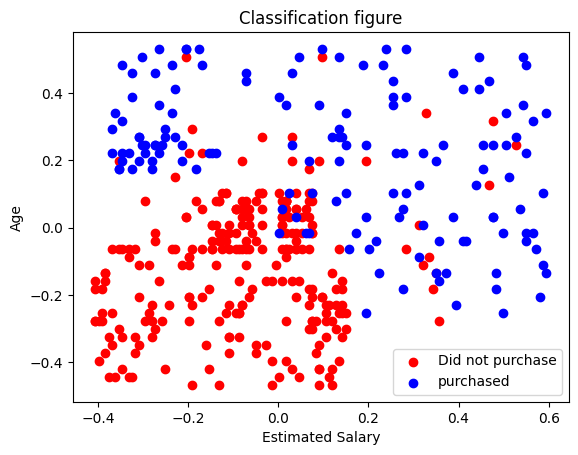

In [88]:
fig, ax = plt.subplots(1,1)
ax.scatter(X0s['EstimatedSalary'], X0s['Age'], color='red', label='Did not purchase')
ax.scatter(X1s['EstimatedSalary'], X1s['Age'], color='blue', label='purchased')
ax.set_xlabel('Estimated Salary')
ax.set_ylabel('Age')
ax.set_title('Classification figure')
ax.legend()
fig.show()

In [89]:
model.fit(X, Y)

In [90]:
X.head()

,Age,EstimatedSalary,x0
0,-0.444167,-0.375870,1.0
1,-0.063214,-0.368463,1.0
2,-0.277500,-0.198093,1.0
3,-0.253690,-0.094389,1.0
4,-0.444167,0.046352,1.0


In [91]:
X = X.drop(columns='x0')
X.head()

,Age,EstimatedSalary
0,-0.444167,-0.375870
1,-0.063214,-0.368463
2,-0.277500,-0.198093
3,-0.253690,-0.094389
4,-0.444167,0.046352


In [92]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# Making Predictions and finding Accuracy

In [93]:
h_arr = model.predict(X)

In [96]:
h_arr = h_arr.flatten()

In [97]:
y_arr = np.array(Y)

In [100]:
c = 0
for (i,j) in zip(h_arr, y_arr):
    if(i == j):
        c += 1
acc = c/len(h_arr)

In [102]:
acc*100

78.5

# I got 78.5% accuracy, the gradient descent optimizer is very basic and slow, I need to upgrade the optimizer to get better results or use another dataset with more datapoints and more features